In [1]:
import numpy as np
import random
import math
import heapq
import multiprocess as mp
import talib as ta
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import time
from island_ga import IslandGGA 
from chromosome import Chromosome 
from data_preprocessing import Data
from single_data_processing import SingleAssetTI
import itertools
import yfinance as yf
from pso import PortfolioPSO
from model_comparator import ModelComparator
from island_ga import IslandGGA
from single_data_processing import SingleAssetTI

import datetime

In [10]:
#GROUPON 
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2022, 12, 31)
period =2019
pSize = 150
num_iter =100
num_runs = 10
#ticker = 'AAPL'
ticker= '2330.TW'


[*********************100%***********************]  1 of 1 completed


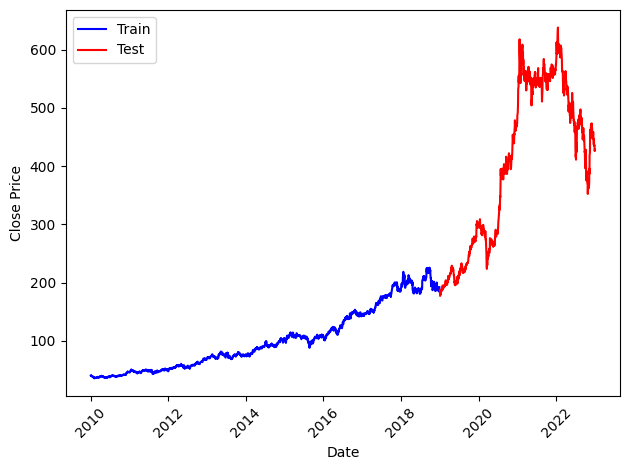

Running model:  ring
Running ring
Generation 1: Best fitness = 4.536125729197912  Average Fitness = 4.534576815010199
Generation 2: Best fitness = 4.536125729197912  Average Fitness = 4.535790828832999
Generation 3: Best fitness = 4.536125729197912  Average Fitness = 4.536125729197909
Generation 4: Best fitness = 4.536125729197912  Average Fitness = 4.536125729197909
Generation 5: Best fitness = 4.536125729197912  Average Fitness = 4.536125729197909
Island 0 Migration - Left 4 - Right 1
Island 1 Migration - Left 0 - Right 2
Island 2 Migration - Left 1 - Right 3
Island 3 Migration - Left 2 - Right 4
Island 4 Migration - Left 3 - Right 0
Generation 6: Best fitness = 4.536125729197912  Average Fitness = 4.536104797925103
Generation 7: Best fitness = 4.536125729197912  Average Fitness = 4.536125729197909
Generation 8: Best fitness = 4.536125729197912  Average Fitness = 4.536083866652296
Generation 9: Best fitness = 4.536125729197912  Average Fitness = 4.536125729197909
Generation 10: Best 

[*********************100%***********************]  1 of 1 completed


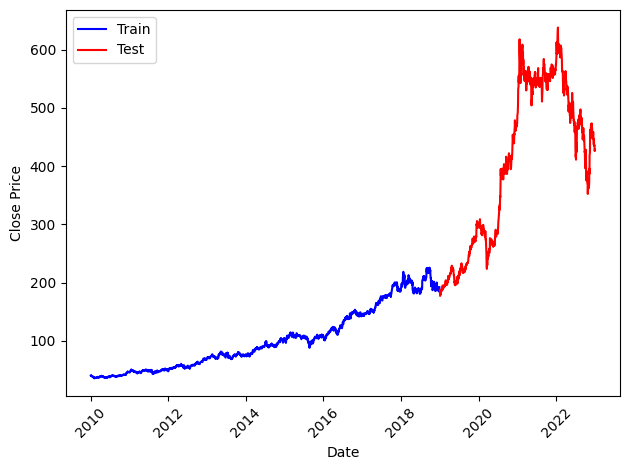

Running model:  ring
Running ring
Generation 1: Best fitness = 4.536125729197912  Average Fitness = 4.5348279902838815
Generation 2: Best fitness = 4.536125729197912  Average Fitness = 4.536062935379489
Generation 3: Best fitness = 4.536125729197912  Average Fitness = 4.536125729197909
Generation 4: Best fitness = 4.536125729197912  Average Fitness = 4.536125729197909
Generation 5: Best fitness = 4.536125729197912  Average Fitness = 4.536125729197909
Island 0 Migration - Left 4 - Right 1
Island 1 Migration - Left 0 - Right 2
Island 2 Migration - Left 1 - Right 3
Island 3 Migration - Left 2 - Right 4
Island 4 Migration - Left 3 - Right 0
Generation 6: Best fitness = 4.536125729197912  Average Fitness = 4.536083866652296
Generation 7: Best fitness = 4.536125729197912  Average Fitness = 4.536125729197909
Generation 8: Best fitness = 4.536125729197912  Average Fitness = 4.536104797925103
Generation 9: Best fitness = 4.536125729197912  Average Fitness = 4.536125729197909
Generation 10: Best

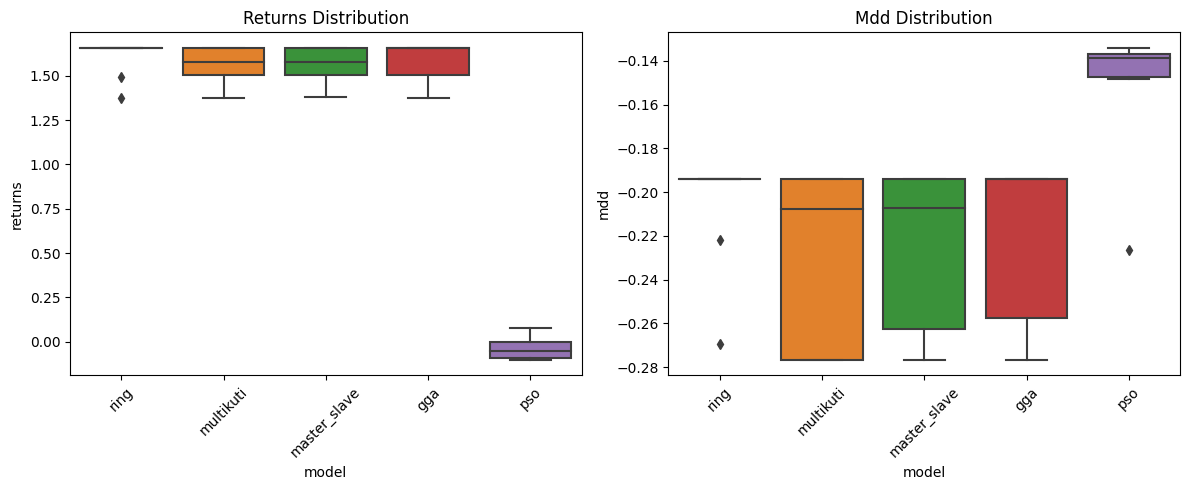

In [11]:
# Usage
import traceback

try:
    # Code that raises the error
    np.random.seed(42)
    comparator = ModelComparator(stock_ticker=ticker,period=period,start_date=start_date, end_date=end_date, pSize=pSize, num_iter=num_iter, num_runs=num_runs)
    comparator.run_comparison()
    results_df = comparator.run_comparison()
    comparator.plot_results(results_df, comparator.optimization_approaches)
    results_df.to_csv('results/uptrend_k2_twse.csv')
        
except Exception as e:
    print("An error occurred:")
    traceback.print_exc()


In [4]:
results_df = pd.read_csv('results/uptrend_k2.csv')
pd.set_option('display.max_rows', None)
results_df.groupby([ 'model'])[[ 'returns', 'mdd']].mean().round(4)

,returns,mdd
model,,
gga,4.5049,-0.2089
master_slave,4.4512,-0.2162
multikuti,4.5049,-0.2089
pso,2.0090,-0.0778
ring,4.5049,-0.2089


In [5]:
training_df = results_df[results_df['phase'] == 'train']
training_df.groupby([ 'model'])[[ 'returns', 'mdd']].mean().round(4)

,returns,mdd
model,,
gga,5.9981,-0.2471
master_slave,5.9981,-0.2471
multikuti,5.9981,-0.2471
pso,3.1414,-0.0840
ring,5.9981,-0.2471


In [9]:
validation_df = results_df[results_df['phase'] == 'validation']
validation_df.groupby([ 'model'])[[ 'returns', 'mdd']].mean().round(4)

,returns,mdd
model,,
gga,3.0117,-0.1706
master_slave,2.9043,-0.1853
multikuti,3.0117,-0.1706
pso,0.8766,-0.0716
ring,3.0117,-0.1706
